<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Root Finding and Optimization

**GOAL:** Find where $f(x) = 0$.

### Example:  Future Time Annuity

When can I retire?

$$ A = \frac{P}{(r / m)} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n} - 1 \right ] $$

$A$ total value after $n$ years

$P$ is payment amount per compounding period

$m$ number of compounding periods per year

$r$ annual interest rate

$n$ number of years to retirement



If I want to retire in 20 years what does the annual interest rate $r$ need to be?

Set $P = \frac{\$18,000}{12} = \$1500, ~~~~ m=12, ~~~~ n=20$.

In [ ]:
def total_value(P, m, r, n):
    """Total value of portfolio given parameters
    
    Based on following formula:
    
    A = \frac{P}{(r / m)} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n}
                - 1 \right ] 
    
    :Input:
     - *P* (float) - Payment amount per compounding period
     - *m* (int) - number of compounding periods per year
     - *r* (float) - annual interest rate
     - *n* (float) - number of years to retirement
     
     :Returns:
     (float) - total value of portfolio
     
    """
    
    return P / (r / float(m)) * ( (1.0 + r / float(m))**(float(m) * n)
                                 - 1.0)

P = 1500.0
m = 12
n = 20.0
    
r = numpy.linspace(0.05, 0.1, 100)
goal = 1e6

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, total_value(P, m, r, n))
axes.plot(r, numpy.ones(r.shape) * goal, 'r--')
axes.set_xlabel("r (interest rate)")
axes.set_ylabel("A (total value)")
axes.set_title("When can I retire?")
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.show()

## Fixed Point Iteration

How do we go about solving this?

Could try to solve at least partially for $r$:

$$ A = \frac{P}{(r / m)} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n} - 1 \right ] ~~~~ \Rightarrow ~~~~~$$

$$ r = \frac{P \cdot m}{A} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n} - 1 \right ] ~~~~ \Rightarrow ~~~~~$$

$$ r = g(r)$$
or 
$$ g(r) - r = 0$$

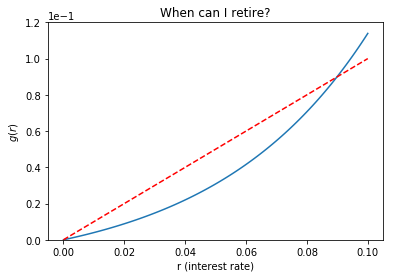

In [61]:
def g(P, m, r, n, A):
    """Reformulated minimization problem
    
    Based on following formula:
    
    g(r) = \frac{P \cdot m}{A} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n} - 1 \right ]
    
    :Input:
     - *P* (float) - Payment amount per compounding period
     - *m* (int) - number of compounding periods per year
     - *r* (float) - annual interest rate
     - *n* (float) - number of years to retirement
     - *A* (float) - total value after $n$ years
     
     :Returns:
     (float) - value of g(r)
     
    """
    
    return P * m / A * ( (1.0 + r / float(m))**(float(m) * n)
                                 - 1.0)

P = 1500.0
m = 12
n = 20.0
    
r = numpy.linspace(0.00, 0.1, 100)
goal = 1e6

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, g(P, m, r, n, goal))
axes.plot(r, r, 'r--')
axes.set_xlabel("r (interest rate)")
axes.set_ylabel("$g(r)$")
axes.set_title("When can I retire?")
axes.set_ylim([0, 0.12])
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.show()

Guess at $r_0$ and check to see what direction we need to go...

1. $r_0 = 0.0800, \quad g(r_0) - r_0 = -0.009317550125425428$
1. $r_1 = 0.0850, \quad g(r_1) - r_1 = -0.00505763375972$
1. $r_2 = 0.0875, \quad g(r_2) - r_2 = -0.00257275331014$

A bit tedious, we can also make this algorithmic:
```python
r_values = numpy.linspace(0.08, 0.09, 10)
for r in r_values:
    print("r = ", r, "g(r) =", g(P, m, r, n, goal))
    print("Difference = ", numpy.abs(g(P, m, r, n, goal) - r))
    r = g(P, m, r, n, goal)
```

In [27]:
r_values = numpy.linspace(0.08, 0.09, 11)
for r in r_values:
    print("r = ", r, "g(r) =", g(P, m, r, n, goal))
    print("Difference = ", numpy.abs(g(P, m, r, n, goal) - r))
    r = g(P, m, r, n, goal)

r =  0.08 g(r) = 0.0706824498746
Difference =  0.00931755012543
r =  0.081 g(r) = 0.0724618973016
Difference =  0.0085381026984
r =  0.082 g(r) = 0.0742768982853
Difference =  0.00772310171469
r =  0.083 g(r) = 0.0761281601585
Difference =  0.00687183984154
r =  0.084 g(r) = 0.0780164042658
Difference =  0.00598359573424
r =  0.085 g(r) = 0.0799423662403
Difference =  0.00505763375972
r =  0.086 g(r) = 0.0819067962853
Difference =  0.00409320371473
r =  0.087 g(r) = 0.0839104594615
Difference =  0.00308954053852
r =  0.088 g(r) = 0.0859541359802
Difference =  0.00204586401985
r =  0.089 g(r) = 0.0880386215017
Difference =  0.00096137849827
r =  0.09 g(r) = 0.0901647274405
Difference =  0.000164727440507


### Example 2:

Let $f(x) = x - e^{-x}$, solve $f(x) = 0$

Equivalent to $x = e^{-x}$ or $x = g(x)$ where $g(x) = e^{-x}$

In [ ]:
x = numpy.linspace(0.2, 1.0, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.exp(-x), 'r')
axes.plot(x, x, 'b')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")

x = 0.4
for steps in range(3):
    print("x = ", x, "Residual = ", numpy.abs(numpy.exp(-x) - x))
    x = numpy.exp(-x)
    axes.plot(x, numpy.exp(-x),'kx')
    axes.text(x, numpy.exp(-x), steps+1, fontsize="15")

plt.show()

### Example 3:

Let $f(x) = \ln x + x$ and solve $f(x) = 0$ or $x = -\ln x$.

Note that this problem is equivalent to $x = e^{-x}$.

In [ ]:
x = numpy.linspace(0.1, 1.0, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, -numpy.log(x), 'r')
axes.plot(x, x, 'b')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")
axes.set_ylim([0, 1.5])

x = 0.5
for steps in range(3):
    print("x = ", x, "Residual = ", numpy.abs(numpy.log(x) + x))
    x = -numpy.log(x)
    axes.plot(x, -numpy.log(x),'kx')
    axes.text(x, -numpy.log(x), steps+1, fontsize="15")
    
plt.show()

These are equivalent problems!  Something is awry...

## Analysis of Fixed Point Iteration

Existence and uniqueness of fixed point problems

*Existence:*

Assume $g \in C[a, b]$, if the range of the mapping $y = g(x)$ satisfies $y \in [a, b]~~~ \forall~~~ x \in [a, b]$ then $g$ has a fixed point in $[a, b]$.

In [ ]:
x = numpy.linspace(0.0, 1.0, 100)

# Plot function and intercept
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.exp(-x), 'r')
axes.plot(x, x, 'b')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")

# Plot domain and range
axes.plot(numpy.ones(x.shape) * 0.4, x, '--k')
axes.plot(numpy.ones(x.shape) * 0.8, x, '--k')
axes.plot(x, numpy.ones(x.shape) * numpy.exp(-0.4), '--k')
axes.plot(x, numpy.ones(x.shape) * numpy.exp(-0.8), '--k')

axes.set_xlim((0.0, 1.0))
axes.set_ylim((0.0, 1.0))

plt.show()

In [ ]:
x = numpy.linspace(0.1, 1.0, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, -numpy.log(x), 'r')
axes.plot(x, x, 'b')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")
axes.set_xlim([0.1, 1.0])
axes.set_ylim([0.1, 1.0])

# Plot domain and range
axes.plot(numpy.ones(x.shape) * 0.4, x, '--k')
axes.plot(numpy.ones(x.shape) * 0.8, x, '--k')
axes.plot(x, numpy.ones(x.shape) * -numpy.log(0.4), '--k')
axes.plot(x, numpy.ones(x.shape) * -numpy.log(0.8), '--k')

plt.show()

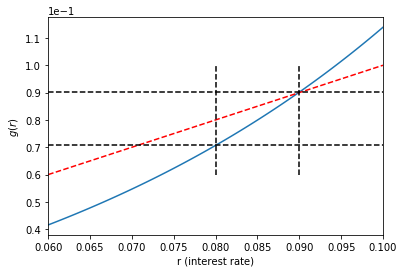

In [71]:
r = numpy.linspace(0.06, 0.1, 100)
goal = 1e6

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, g(P, m, r, n, goal))
axes.plot(r, r, 'r--')
axes.set_xlabel("r (interest rate)")
axes.set_ylabel("$g(r)$")
axes.set_xlim([0.06, 0.1])
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

axes.plot(numpy.ones(r.shape) * 0.08, r, '--k')
axes.plot(numpy.ones(r.shape) * 0.09, r, '--k')
axes.plot(r, numpy.ones(r.shape) * g(P, m, 0.08, n, goal), '--k')
axes.plot(r, numpy.ones(r.shape) * g(P, m, 0.09, n, goal), '--k')

plt.show()

*Uniqueness:*

Additionally, suppose $g'(x)$ is defined on $x \in [a, b]$ and $\exists K < 1$ such that

$$
    |g'(x)| \leq K < 1 ~~~ \forall ~~~ x \in (a,b)
$$

then $g$ has a unique fixed point $P \in [a,b]$

In [ ]:
x = numpy.linspace(0.4, 0.8, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.abs(-numpy.exp(-x)), 'r')
axes.plot(x, numpy.ones(x.shape), 'k--')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")
axes.set_ylim((0.0, 1.1))
plt.show()

*Asymptotic convergence*: Behavior of fixed point iterations

$$x_{k+1} = g(x_k)$$

Assume that $\exists ~ x^\ast$ s.t. $x^\ast = g(x^\ast)$ (i.e. $x^\ast$ is the fixed point), then define

$$
    x_k = x^\ast + e_k ~~~~~~~~~~~~~~ x_{k+1} = x^\ast + e_{k+1}
$$
and
$$
    x^\ast + e_{k+1} = g(x^\ast + e_k)
$$

Taylor expand the function $g$ about $x^\ast$:

$$
    g(x) = g(x^\ast) + g'(x^\ast) (x - x^\ast) + \frac{g''(x^\ast)}{2!} (x - x^\ast)^2 + \mathcal{O}((x - x^\ast)^3)
$$

Evaluate this series at $x_k = x^\ast + e_k$ to find

$$
    g(x^\ast + e_k) = g(x^\ast) + g'(x^\ast) e_k + \frac{g''(x^\ast) e_k^2}{2} + \mathcal{O}(e_k^3)
$$

therefore from our definition from before that $x^\ast + e_{k+1} = g(x^\ast + e_k)$ we have

$$
    x^\ast + e_{k+1} = g(x^\ast) + g'(x^\ast) e_k + \frac{g''(x^\ast) e_k^2}{2} + \mathcal{O}(e_k^3)
$$

Note that because $x^* = g(x^*)$ these terms cancel leaving

$$e_{k+1} = g'(x^*) e_k + \frac{g''(x^*) e_k^2}{2}$$

So if $|g'(x^*)| \leq K < 1$ we can conclude that

$$|e_{k+1}| = K |e_k|$$

which shows convergence.  Also note that $K$ is related to $|g'(x^*)|$.

### Convergence of iterative schemes

Given any iterative scheme where

$$|e_{k+1}| = C |e_k|^n$$

If $C < 1$ and:
 - $n=1$ then the scheme is **linearly convergent**
 - $n=2$ then the scheme is **quadratically convergent**
 - $n > 1$ the scheme can also be called **superlinearly convergent**

If $C > 1$ then the scheme is **divergent**



### Examples Revisited
$g(x) = e^{-x}$ with $x^* \approx 0.56$
 
   $$|g'(x^*)| = |-e^{-x^*}| \approx 0.56$$
   

$g(x) = - \ln x \quad \text{with} \quad x^* \approx 0.56$

   $$|g'(x^*)| = \frac{1}{|x^*|} \approx 1.79$$
   

$$
    r = g(r) = \frac{P \cdot m}{A} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n} - 1 \right ]
$$

g'(r) =  P*m*n*(1 + r/m)**(m*n)/(A*(1 + r/m))
g'(r*) =  2.14108802539073


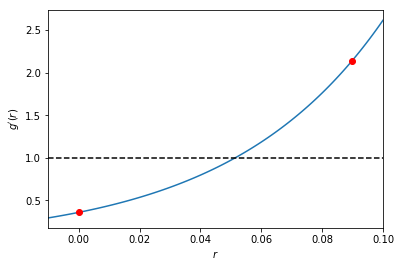

In [57]:
import sympy
r, P, m, A, n = sympy.symbols('r P m A n')
g = P * m / A * ((1 + r /m)**(m * n) - 1)
g_prime = g.diff(r)
r_star = 0.08985602484084668
print("g'(r) = ", g_prime)
print("g'(r*) = ", g_prime.subs({P: 1500.0, m: 12, n:20, A: 1e6, r: r_star}))

f = sympy.lambdify(r, g_prime.subs({P: 1500.0, m: 12, n:20, A: 1e6}))
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
r = numpy.linspace(-0.01, 0.1, 100)
axes.plot(r, f(r))
axes.plot(r, numpy.ones(r.shape), 'k--')
axes.plot(r_star, f(r_star), 'ro')
axes.plot(0.0, f(0.0), 'ro')
axes.set_xlim((-0.01, 0.1))
axes.set_xlabel("$r$")
axes.set_ylabel("$g'(r)$")

## Better ways for root-finding/optimization

If $x^*$ is a fixed point of $g(x)$ then $x^*$ is also a *root* of $f(x^*) = g(x^*) - x^*$ s.t. $f(x^*) = 0$.

For instance:

$$f(r) = r - \frac{m P}{A} \left [ \left (1 + \frac{r}{m} \right)^{m n} - 1 \right ] =0 $$

or

$$f(r) = A - \frac{m P}{r} \left [ \left (1 + \frac{r}{m} \right)^{m n} - 1 \right ] =0 $$

## Classical Methods
 - Bisection (linear convergence)
 - Newton's Method (quadratic convergence)
 - Secant Method (super-linear)
 
## Combined Methods
 - RootSafe (Newton + Bisection)
 - Brent's Method (Secant + Bisection)

### Bracketing and Bisection

A **bracket** is an interval $[a,b]$ that contains exactly one zero or minima/maxima of interest.  

In the case of a zero the bracket should satisfy 
$$
    \text{sign}(f(a)) \neq \text{sign}(f(b)).
$$

In the case of minima or maxima we need 
$$
    \text{sign}(f'(a)) \neq \text{sign}(f'(b))
$$

**Theorem**:  

Let
$$
    f(x) \in C[a,b] \quad \text{and} \quad \text{sign}(f(a)) \neq \text{sign}(f(b))
$$

then there exists a number 
$$
    c \in (a,b) \quad \text{s.t.} \quad f(c) = 0.
$$
(proof uses intermediate value theorem)

In [ ]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
r = numpy.linspace(0.05, 0.1, 100)
f = lambda r, A, m, P, n: A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r, A, m, P, n), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')
axes.set_xlabel("r (%)")
axes.set_ylabel("f(r)")
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

a = 0.075
b = 0.095
axes.plot(a, f(a, A, m, P, n), 'ko')
axes.plot([a, a], [0.0, f(a, A, m, P, n)], 'k--')
axes.plot(b, f(b, A, m, P, n), 'ko')
axes.plot([b, b], [f(b, A, m, P, n), 0.0], 'k--')

plt.show()

Basic bracketing algorithms shrink the bracket while ensuring that the root/extrema remains within the bracket.

What ways could we "shrink" the bracket so that the end points converge to the root/extrema?

#### Bisection Algorithm

Given a bracket $[a,b]$ and a function $f(x)$ - 
1. Initialize with bracket
2. Iterate
   1. Cut bracket in half and check to see where the zero is
   2. Set bracket to new bracket based on what direction we went

Success!
  x* = 0.08985602484084668
  f(x*) = -7.796974387019873e-05
  number of steps = 29


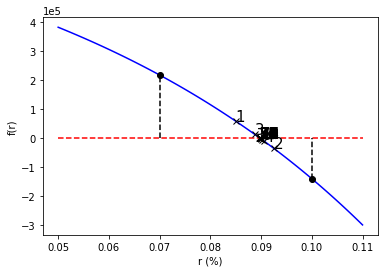

In [22]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
r = numpy.linspace(0.05, 0.11, 100)
f = lambda r, A=A, m=m, P=P, n=n: A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)

# Initialize bracket
a = 0.07
b = 0.10

# Setup figure to plot convergence
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r, A, m, P, n), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')
axes.set_xlabel("r (%)")
axes.set_ylabel("f(r)")
# axes.set_xlim([0.085, 0.091])
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axes.plot(a, f(a, A, m, P, n), 'ko')
axes.plot([a, a], [0.0, f(a, A, m, P, n)], 'k--')
axes.plot(b, f(b, A, m, P, n), 'ko')
axes.plot([b, b], [f(b, A, m, P, n), 0.0], 'k--')

# Algorithm parameters
TOLERANCE = 1e-4
MAX_STEPS = 100

# Initialize loop
f_a = f(a)
f_b = f(b)
delta_x = b - a

# Loop until we reach the TOLERANCE or we take MAX_STEPS
for step in range(MAX_STEPS):
    c = a + delta_x / 2.0
    f_c = f(c)
    if numpy.sign(f_a) != numpy.sign(f_c):
        b = c
        f_b = f_c
    else:
        a = c
        f_a = f_c
    delta_x = b - a
    
    # Plot iteration
    axes.plot(c, f(c),'kx')
    axes.text(c, f(c), str(step + 1), fontsize="15")
    
    # Check tolerance - Could also check the size of delta_x
    if numpy.abs(f_c) < TOLERANCE:
        break
        
if step == MAX_STEPS - 1:
    print("Reached maximum number of steps!")
else:
    print("Success!")
    print("  x* = %s" % c)
    print("  f(x*) = %s" % f(c))
    print("  number of steps = %s" % step)

#### Convergence of Bisection

Generally have
$$
    |e_{k+1}| = C |e_k|^n
$$
where we need $C < 1$ and $n < 0$.

Letting $\Delta x_k$ be the width of the $k$th bracket we can then estimate the error with
$$
    e_k \approx \Delta x_k
$$
and therefore
$$
    e_{k+1} \approx \frac{1}{2} \Delta x_k.
$$
Due to the relationship then between $x_k$ and $e_k$ we then know
$$
    |e_{k+1}| = \frac{1}{2} |e_k|
$$
so therefore the method is linearly convergent.

### Newton's Method (Newton-Raphson)
 - Given a bracket, bisection is guaranteed to converge linearly to a root
 - However bisection uses almost no information about $f(x)$ beyond its sign at a point
 
**Basic Idea**: Given $f(x)$ and $f'(x)$ use a linear approximation to $f(x)$ "locally" and use the x-intercept of the resulting line to predict where $x^*$ might be.

Given current location $x_k$, we have $f(x_k)$ and $f'(x_k)$ and form a line through the point $(x_k, f(x_k))$:

Form equation for the line:

$$y = f'(x_k) x + b$$

Solve for the y-intercept value $b$

$$f(x_k) = f'(x_k) x_k + b$$

$$b = f(x_k) - f'(x_k) x_k$$

and simplify.

$$y = f'(x_k) x + f(x_k) - f'(x_k) x_k$$

$$y = f'(x_k) (x - x_k) + f(x_k)$$

Now find the intersection of our line and the x-axis (i.e. when $y = 0$) and use the resulting value of $x$ to set $x_{k+1}$ 

$$
    0 = f'(x_k) (x_{k+1}-x_k) + f(x_k)
$$

$$
    x_{k+1} = x_k-\frac{f(x_k)}{f'(x_k)}
$$

An alternative method of derivation for Newton-Raphson (and more in line with our methods) uses Taylor series.  Expand the function $f(x)$ in a Taylor series about the current Newton-Raphson iteration $x_k$:

$$
    f(x) = f(x_k) + f'(x_k) (x - x_k) + \frac{f''(x_k)}{2!} (x - x_k)^2 + \mathcal{O}((x-x_k)^3)
$$

Let $\delta_k$ be the update to the $x_{k+1}$ iteration such that
$$
    x_{k+1} = x_k + \Delta x_k
$$
and evaluate our expression for $f(x)$ at $x_{k+1}$:
$$
    f(x_{k+1}) = f(x_k) + f'(x_k) \Delta x_k + \frac{f''(x_k)}{2!} \Delta x_k^2 + \mathcal{O}(\Delta x_k^3)
$$

Now assume that $x_{k+1} = x^\ast$, if this is the case the above simplifies to
$$
    0 = f(x_k) + f'(x_k) \Delta x_k + \frac{f''(x_k)}{2!} \Delta x_k^2 + \mathcal{O}(\Delta x_k^3)
$$
and dropping the higher order terms leads to
$$
    \Delta x_k = - \frac{f(x_k)}{f'(x_k)}
$$
assuming that $f \in \mathbb R$ leading to the update
$$
    x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.
$$

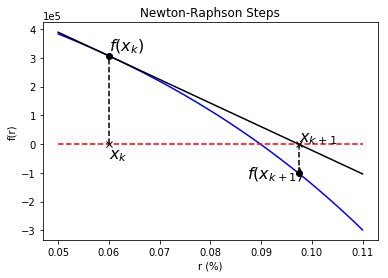

In [11]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
r = numpy.linspace(0.05, 0.11, 100)
f = lambda r, A=A, m=m, P=P, n=n: \
        A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)
f_prime = lambda r, A=A, m=m, P=P, n=n: \
            -P*m*n*(1.0 + r/m)**(m*n)/(r*(1.0 + r/m)) \
                + P*m*((1.0 + r/m)**(m*n) - 1.0)/r**2

# Initial guess
x_k = 0.06

# Setup figure to plot convergence
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')

# Plot x_k point
axes.plot([x_k, x_k], [0.0, f(x_k)], 'k--')
axes.plot(x_k, f(x_k), 'ko')
axes.text(x_k, -5e4, "$x_k$", fontsize=16)
axes.plot(x_k, 0.0, 'xk')
axes.text(x_k, f(x_k) + 2e4, "$f(x_k)$", fontsize=16)
axes.plot(r, f_prime(x_k) * (r - x_k) + f(x_k), 'k')

# Plot x_{k+1} point
x_k = x_k - f(x_k) / f_prime(x_k)
axes.plot([x_k, x_k], [0.0, f(x_k)], 'k--')
axes.plot(x_k, f(x_k), 'ko')
axes.text(x_k, 1e4, "$x_{k+1}$", fontsize=16)
axes.plot(x_k, 0.0, 'xk')
axes.text(0.0873, f(x_k) - 2e4, "$f(x_{k+1})$", fontsize=16)

axes.set_xlabel("r (%)")
axes.set_ylabel("f(r)")
axes.set_title("Newton-Raphson Steps")
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

plt.show()

What does the alogrithm look like for Newton-Raphson?

### Algorithm

1. Initialize $x_k$
1. Begin loop
  1. Compute $f(x_k)$ and $f'(x_k)$
  1. Use these to compute new $x_{k+1}$
  1. Check stopping criteria

Success!
  x* = 0.08985602483470316
  f(x*) = 5.122274160385132e-09
  number of steps = 5


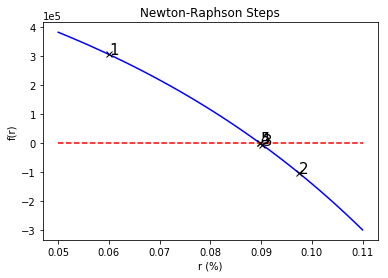

In [13]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
r = numpy.linspace(0.05, 0.11, 100)
f = lambda r, A=A, m=m, P=P, n=n: \
        A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)
f_prime = lambda r, A=A, m=m, P=P, n=n: \
            -P*m*n*(1.0 + r/m)**(m*n)/(r*(1.0 + r/m)) \
                + P*m*((1.0 + r/m)**(m*n) - 1.0)/r**2

# Algorithm parameters
MAX_STEPS = 200
TOLERANCE = 1e-4
        
# Initial guess
x_k = 0.06

# Setup figure to plot convergence
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')

for n in range(1, MAX_STEPS + 1):
    axes.plot(x_k, f(x_k),'kx')
    axes.text(x_k, f(x_k), str(n), fontsize="15")
    x_k = x_k - f(x_k) / f_prime(x_k)
    if numpy.abs(f(x_k)) < TOLERANCE:
        break
        
if n == MAX_STEPS:
    print("Reached maximum number of steps!")
else:
    print("Success!")
    print("  x* = %s" % x_k)
    print("  f(x*) = %s" % f(x_k))
    print("  number of steps = %s" % n)

axes.set_xlabel("r (%)")
axes.set_ylabel("f(r)")
axes.set_title("Newton-Raphson Steps")
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

plt.show()

### Example:

$$f(x) = x - e^{-x}$$

$$f'(x) = 1 + e^{-x}$$

$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} = x_k - \frac{x_k - e^{-x_k}}{1 + e^{-x_k}}$$


### Asymptotic Convergence of Newton's Method

For a simple root (non-multiplicative) - Let $g(x) = x - \frac{f(x)}{f'(x)}$, then

$$x_{k+1} = g(x_k)$$

Definitions of errors and iteration:

$$x_{k+1} = x^* + e_{k+1} ~~~~~ x_k = x^* + e_k$$

General Taylor expansion:

$$
    x^* + e_{k+1} = g(x^* + e_k) = g(x^*) + g'(x^*) e_k + \frac{g''(x^*) e_k^2}{2!} + \mathcal{O}(e_k^3)
$$

Note that as before $x^*$ and $g(x^*)$ cancel:

$$e_{k+1} = g'(x^*) e_k + \frac{g''(x^*) e_k^2}{2!} + \ldots$$

What about $g'(x^*)$ though?  

$$\begin{aligned}
    g(x) &= x - \frac{f(x)}{f'(x)} \\
    g'(x) & = 1 - \frac{f'(x)}{f'(x)} + \frac{f(x) f''(x)}{(f'(x))^2} = \frac{f(x) f''(x)}{(f'(x))^2}
\end{aligned}$$

which evaluated at $x = x^*$ becomes

$$
    g'(x^*) = \frac{f(x^*)f''(x^*)}{f'(x^*)^2} = 0
$$

since $f(x^\ast) = 0$ by definition (assuming $f''(x^\ast)$ and $f'(x^\ast)$ are appropriately behaved).

Back to our expansion we have again

$$
    e_{k+1} = g'(x^*) e_k + \frac{g''(x^*) e_k^2}{2!} + \ldots
$$

which simplifies to 

$$
    e_{k+1} = \frac{g''(x^*) e_k^2}{2!} + \ldots
$$

$$
    e_{k+1} = \frac{g''(x^*) e_k^2}{2!} + \ldots
$$
leads to 
$$
    |e_{k+1}| = \left | \frac{g''(x^*)}{2!} \right | |e_k|^2
$$

Newton's method is therefore quadratically convergent where the the constant is controlled by the second derivative.

For a multiple root (e.g. $f(x) = (x-1)^2$) the case is not particularly rosey unfortunately.  Why might this be?

### Example:
$f(x) = \sin (2 \pi x)$

$$x_{k+1} = x_k - \frac{\sin (2 \pi x)}{2 \pi \cos (2 \pi x)}= x_k - \frac{1}{2 \pi} \tan (2 \pi x)$$

In [ ]:
x = numpy.linspace(0, 2, 1000)
f = lambda x: numpy.sin(2.0 * numpy.pi * x)
f_prime = lambda x: 2.0 * numpy.pi * numpy.cos(2.0 * numpy.pi * x)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, f(x),'b')
axes.plot(x, f_prime(x), 'r')
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title("Comparison of $f(x)$ and $f'(x)$")
axes.set_ylim((-2,2))
axes.set_xlim((0,2))
axes.plot(x, numpy.zeros(x.shape), 'k--')

x_k = 0.3
axes.plot([x_k, x_k], [0.0, f(x_k)], 'ko')
axes.plot([x_k, x_k], [0.0, f(x_k)], 'k--')
axes.plot(x, f_prime(x_k) * (x - x_k) + f(x_k), 'k')


x_k = x_k - f(x_k) / f_prime(x_k)
axes.plot([x_k, x_k], [0.0, f(x_k)], 'ko')
axes.plot([x_k, x_k], [0.0, f(x_k)], 'k--')

plt.show()

In [ ]:
x = numpy.linspace(0, 2, 1000)
f = lambda x: numpy.sin(2.0 * numpy.pi * x)
x_kp = lambda x: x - 1.0 / (2.0 * numpy.pi) * numpy.tan(2.0 * numpy.pi * x)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, f(x),'b')
axes.plot(x, x_kp(x), 'r')
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title("Comparison of $f(x)$ and $f'(x)$")
axes.set_ylim((-2,2))
axes.set_xlim((0,2))
axes.plot(x, numpy.zeros(x.shape), 'k--')

plt.show()

#### Other Issues

Need to supply both $f(x)$ and $f'(x)$, could be expensive
 
Example:  FTV equation $f(r) = A - \frac{m P}{r} \left[ \left(1 + \frac{r}{m} \right )^{m n} - 1\right]$

Can use symbolic differentiation (`sympy`)

### Secant Methods

Is there a method with the convergence of Newton's method but without the extra derivatives?  What way would you modify Newton's method so that you would not need $f'(x)$?

Given $x_k$ and $x_{k-1}$ represent the derivative as the approximation

$$f'(x) \approx \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}$$

Combining this with the Newton approach leads to

$$x_{k+1} = x_k - \frac{f(x_k) (x_k - x_{k-1}) }{f(x_k) - f(x_{k-1})}$$

This leads to superlinear convergence and not quite quadratic as the exponent on the convergence is $\approx 1.7$.

Alternative interpretation, fit a line through two points and see where they intersect the x-axis.

$$(x_k, f(x_k)) ~~~~~ (x_{k-1}, f(x_{k-1})$$

$$y = \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}} (x - x_k) + b$$

$$b = f(x_{k-1}) - \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}} (x_{k-1} - x_k)$$

$$ y = \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}} (x - x_k) + f(x_k)$$

Now solve for $x_{k+1}$ which is where the line intersects the x-axies ($y=0$)

$$0 = \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}} (x_{k+1} - x_k) + f(x_k)$$

$$x_{k+1} = x_k - \frac{f(x_k)  (x_k - x_{k-1})}{f(x_k) - f(x_{k-1})}$$

In [ ]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
r = numpy.linspace(0.05, 0.11, 100)
f = lambda r, A=A, m=m, P=P, n=n: \
        A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)

# Initial guess
x_k = 0.07
x_km = 0.06

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')

axes.plot(x_k, 0.0, 'ko')
axes.plot(x_k, f(x_k), 'ko')
axes.plot([x_k, x_k], [0.0, f(x_k)], 'k--')
axes.plot(x_km, 0.0, 'ko')
axes.plot(x_km, f(x_km), 'ko')
axes.plot([x_km, x_km], [0.0, f(x_km)], 'k--')

axes.plot(r, (f(x_k) - f(x_km)) / (x_k - x_km) * (r - x_k) + f(x_k), 'k')
x_kp = x_k - (f(x_k) * (x_k - x_km) / (f(x_k) - f(x_km)))
axes.plot(x_kp, 0.0, 'ro')
axes.plot([x_kp, x_kp], [0.0, f(x_kp)], 'r--')
axes.plot(x_kp, f(x_kp), 'ro')

axes.set_xlabel("r (%)")
axes.set_ylabel("f(r)")
axes.set_title("Secant Method")
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

plt.show()

What would the algorithm look like for such a method?

#### Algorithm

Given $f(x)$, given bracket $[a,b]$, a `TOLERANCE`, and a `MAX_STEPS` (note we need two points to start).

1. Initialize $x_1 = a$, $x_2 = b$, $f_1 = f(x_1)$, and $f_2 = f(x_2)$
2. Loop until either `MAX_STEPS` is reached or `TOLERANCE` is achieved
   1. Calculate new update $x_{k+1}$ by update formula
   2. Check for convergence and break if reached
   3. Update parameters $x_1$, $x_2$, $f_1 = f(x_1)$ and $f_2(x_2)$

In [ ]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
r = numpy.linspace(0.05, 0.11, 100)
f = lambda r, A=A, m=m, P=P, n=n: \
        A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)
f_prime = lambda r, A=A, m=m, P=P, n=n: \
            -P*m*n*(1.0 + r/m)**(m*n)/(r*(1.0 + r/m)) \
                + P*m*((1.0 + r/m)**(m*n) - 1.0)/r**2

# Algorithm parameters
MAX_STEPS = 50
TOLERANCE = 1e-4
        
# Initial bracket
x_k = 0.07
x_km = 0.06

# Setup figure to plot convergence
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')

for n in range(1, MAX_STEPS + 1):
    axes.plot(x_k, f(x_k), 'o')
    axes.text(x_k + 0.0025, f(x_k), n, fontsize="15")
    x_kp = x_k - f(x_k) * (x_k - x_km) / (f(x_k) - f(x_km))
    x_km = x_k
    x_k = x_kp
    print("Residual = ", numpy.abs(f(x_k)))
    if numpy.abs(f(x_k)) < TOLERANCE:
        break
        
if n == MAX_STEPS:
    print("Reached maximum number of steps!")
else:
    print("Success!")
    print("  x* = %s" % x_k)
    print("  f(x*) = %s" % f(x_k))
    print("  number of steps = %s" % n)

axes.set_xlabel("r (%)")
axes.set_ylabel("f(r)")
axes.set_title("Secant Method")
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

plt.show()

#### Comments

 - Secant method as shown is equivalent to linear interpolation
 - Can use higher order interpolation for higher order secant methods
 - Convergence is not quite quadratic
 - Not guaranteed to converge
 - Do not preserve brackets
 - Almost as good as Newton's method if your initial guess is good.

### Hybrid Methods

Combine attributes of methods with others to make one great algorithm to rule them all (not really)

#### Goals
1. Robustness:  Given a bracket $[a,b]$, maintain bracket
1. Efficiency:  Use superlinear convergent methods when possible

#### Options
 - Methods requiring $f'(x)$
   - NewtSafe (RootSafe, Numerical Recipes)
   - Newton's Method within a bracket, Bisection otherwise
 - Methods not requiring $f'(x)$
   - Brent's Algorithm (zbrent, Numerical Recipes)
     - Combination of bisection, secant and inverse quadratic interpolation
   - `scipy.optimize` package

## Optimization (finding extrema)

I want to find the extrema of a function $f(x)$ on a given interval $[a,b]$.

A few approaches:
 - Bracketing Algorithms:  Golden-Section Search (linear)
 - Interpolation Algorithms: Repeated parabolic interpolation
 - Hybrid Algorithms 

### Bracketing Algorithm (Golden Section Search)

Given $f(x) \in C[x_0,x_3]$ that is convex (concave) over an interval $x \in [x_0,x_3]$ reduce the interval size until it brackets the minimum (maximum).

Note that we no longer have the $x=0$ help we had before so bracketing and doing bisection is a bit more tricky in this case.  In particular choosing your initial bracket is important!

#### Basic Idea

We start with three points, say $x_0$, $x_1$, and $x_3$.  We assume that $[x_0,x_3]$ brackets a minimum and that $x_1$ is somewhere inside of this bracket.  

Now we want to pick another point $x_2$ that lives between $x_1$ and $x_3$.

If $f(x_1) < f(x_2)$ then we know the minimum is between $x_0$ and $x_2$.

If $f(x_1) > f(x_2)$ then we know the minimum is between $x_1$ and $x_3$.

In [ ]:
f = lambda x: x**2

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figheight(fig.get_figheight() * 2)

search_points = [-1.0, -0.5, 0.75, 1.0]
axes = fig.add_subplot(2, 2, 1)
x = numpy.linspace(search_points[0] - 0.1, search_points[-1] + 0.1, 100)
axes.plot(x, f(x), 'b')
for (i, point) in enumerate(search_points):
    axes.plot(point, f(point),'or')
    axes.text(point + 0.05, f(point), str(i))
axes.plot(0, 0, 'sk')
axes.set_xlim((search_points[0] - 0.1, search_points[-1] + 0.1))
axes.set_title("$f(x_1) < f(x_2) \Rightarrow [x_0, x_2]$")

search_points = [-1.0, -0.75, 0.5, 1.0]
axes = fig.add_subplot(2, 2, 2)
x = numpy.linspace(search_points[0] - 0.1, search_points[-1] + 0.1, 100)
axes.plot(x, f(x), 'b')
for (i, point) in enumerate(search_points):
    axes.plot(point, f(point),'or')
    axes.text(point + 0.05, f(point), str(i))
axes.plot(0, 0, 'sk')
axes.set_xlim((search_points[0] - 0.1, search_points[-1] + 0.1))
axes.set_title("$f(x_1) > f(x_2) \Rightarrow [x_1, x_3]$")

search_points = [-1.0, 0.25, 0.75, 1.0]
axes = fig.add_subplot(2, 2, 3)
x = numpy.linspace(search_points[0] - 0.1, search_points[-1] + 0.1, 100)
axes.plot(x, f(x), 'b')
for (i, point) in enumerate(search_points):
    axes.plot(point, f(point),'or')
    axes.text(point + 0.05, f(point), str(i))
axes.plot(0, 0, 'sk')
axes.set_xlim((search_points[0] - 0.1, search_points[-1] + 0.1))
axes.set_title("$f(x_1) < f(x_2) \Rightarrow [x_0, x_2]$")

search_points = [-1.0, -0.75, -0.25, 1.0]
axes = fig.add_subplot(2, 2, 4)
x = numpy.linspace(search_points[0] - 0.1, search_points[-1] + 0.1, 100)
axes.plot(x, f(x), 'b')
for (i, point) in enumerate(search_points):
    axes.plot(point, f(point),'or')
    axes.text(point + 0.05, f(point), str(i))
axes.plot(0, 0, 'sk')
axes.set_xlim((search_points[0] - 0.1, search_points[-1] + 0.1))
axes.set_title("$f(x_1) > f(x_2) \Rightarrow [x_1, x_3]$")

plt.show()

#### Golden Section Search - Picking Intervals

Define a bracket $[x_0,x_3]$ and suppose we have two new search points $x_1$ and $x_2$ that separates $[x_0,x_3]$ into two new overlapping brackets.

Define $x_1-x_0 = a$, $x_1 - x_3 = b$, $x_2 - x_1 = c$, then for **Golden Section Search** we require: 
 - $a + c = b$.
 - Distance between subsequent triples are proportional.

The first rule implies:
$$\begin{aligned}
    a + c &= b \\
    x_1 - x_0 + x_2 - x_1 &= x_1 - x_3 \\
    x_2 - x_0 &= x_1 - x_3.
\end{aligned}$$

Assume that this allows us to pick $x_3$ (we have already figured out how to choose $x_1$).  We then know
$$
    x_3 = x_1 - x_2 + x_0.
$$

Subsequent proportionality means that we are attempting to always shrink the bracket we are looking at.  This implies we must consider whether we choose the new triplet based on $f(x_1) < f(x_2)$ and $f(x_1) > f(x_2)$.

If $f(x_1) < f(x_2)$ then we choose $(x_0, x_1, x_2)$ as our new triplet meaning
$$
    \frac{a}{b} = \frac{c}{a}
$$

If $f(x_1) > f(x_2)$ then we choose $(x_1, x_2, x_3)$ as our new triplet meaning
$$
    \frac{a}{b} = \frac{c}{b-c}
$$

Ok, that's weird.  So what's golden about this?

Take
$$
    \frac{a}{b} = \frac{c}{a} ~~~~ \text{and} ~~~~ \frac{a}{b} = \frac{c}{b-c}
$$
and eliminate $c$ to find
$$\begin{aligned}
   c = \frac{a^2}{b} \Rightarrow \frac{a}{b} &= \frac{1}{b-\frac{a^2}{b}} \frac{a^2}{b} \\
   \frac{a}{b} &= \frac{1}{b^2-a^2} \frac{a^2}{b^2}\\
   1 &= \frac{1}{b^2-a^2} \frac{a}{b} \\
   1 &= \left(\frac{b}{a}\right)^2 - \frac{b}{a}
\end{aligned}$$

This implies $\frac{b}{a} = \varphi$, i.e. the golden ratio.

In [ ]:
f = lambda x: (x - 0.25)**2 + 0.5
phi = (numpy.sqrt(5.0) - 1.0) / 2.0

x = [-1.0, None, None, 1.0]
x[1] = x[3] - phi * (x[3] - x[0])
x[2] = x[0] + phi * (x[3] - x[0])

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
t = numpy.linspace(-2.0, 2.0, 100)
axes.plot(t, f(t), 'b')
axes.plot([x[0], x[2]], [0.0, 0.0], 'g')
axes.plot([x[1], x[3]], [-0.2, -0.2], 'r')
axes.plot([x[0], x[0]], [0.0, f(x[0])], 'g--')
axes.plot([x[2], x[2]], [0.0, f(x[2])], 'g--')
axes.plot([x[1], x[1]], [-0.2, f(x[2])], 'r--')
axes.plot([x[3], x[3]], [-0.2, f(x[3])], 'r--')
for (n, point) in enumerate(x):
    axes.plot(point, f(point), 'ok')
    axes.text(point, f(point)+0.1, n, fontsize='15')

axes.set_xlim((search_points[0] - 0.1, search_points[-1] + 0.1))
axes.set_ylim((-1.0, 3.0))
plt.show()

#### Algorithm
1. Initialize bracket $[x_0,x_3]$
1. Initialize points $x_1 = x_3 - \varphi \cdot (x_3 - x_0)$ and $x_2 = x_0 + \varphi \cdot (x_3 - x_0)$
1. Loop
   1. Evaluate $f_1$ and $f_2$
   1. If $f_1 < f_2$ then we pick the left interval for the next iteration
   1. and otherwise pick the right interval
   1. Check size of bracket for convergence $x_3 - x_0 <$ `TOLERANCE`

In [ ]:
# New Test Function!
def f(t):
    """Simple function for minimization demos"""
    return -3.0 * numpy.exp(-(t - 0.3)**2 / (0.1)**2) \
           +      numpy.exp(-(t - 0.6)**2 / (0.2)**2) \
           +      numpy.exp(-(t - 1.0)**2 / (0.2)**2) \
           +      numpy.sin(t)                        \
           -      2.0

t = numpy.linspace(0, 2, 200)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, f(t))
axes.set_xlabel("t (days)")
axes.set_ylabel("People (N)")
axes.set_title("Decrease in Population due to SPAM Poisoning")

plt.show()

In [ ]:
phi = (numpy.sqrt(5.0) - 1.0) / 2.0

TOLERANCE = 1e-4
MAX_STEPS = 100

x = [0.2, None, None, 0.5]
x[1] = x[3] - phi * (x[3] - x[0])
x[2] = x[0] + phi * (x[3] - x[0])

t = numpy.linspace(0, 2, 200)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, f(t))
axes.set_xlabel("t (days)")
axes.set_ylabel("People (N)")
axes.set_title("Decrease in Population due to SPAM Poisoning")

success = False
for n in range(1, MAX_STEPS + 1):
    axes.plot(x[0], f(x[0]),'ko')
    axes.plot(x[3], f(x[3]),'ko')
    f_1 = f(x[1])
    f_2 = f(x[2])
    
    if f_1 < f_2:
        x[3] = x[2]
        x[2] = x[1]
        x[1] = x[3] - phi * (x[3] - x[0])
    else:
        x[0] = x[1]
        x[1] = x[2]
        x[2] = x[0] + phi * (x[3] - x[0])
        
    if numpy.abs(x[3] - x[0]) < TOLERANCE:
        success = True
        break
        
if success:
    print("Success!")
    print("  t* = %s" % str((x[3] + x[0]) / 2.0))
    print("  f(t*) = %s" % f((x[3] + x[0]) / 2.0))
    print("  number of steps = %s" % n)
else:
    print("Reached maximum number of steps!")
    
plt.show()

### Interpolation Approach

Successive parabolic interpolation - similar to secant method

Basic idea:  Fit polynomial to function using three points, find it's minima, and guess new points based on that minima

1. What do we need to fit a polynomial $p_n(x)$ of degree $n \geq 2$?

2. How do we construct the polynomial $p_2(x)$?

3. Once we have constructed $p_2(x)$ how would we find the minimum?

#### Algorithm

Given $f(x)$ and $[x_0,x_1]$ - Note that unlike a bracket these will be a sequence of better approximations to the minimum.
1. Initialize $x = [x_0, x_1, (x_0+x_1)/2]$
1. Loop
   1. Evaluate function $f(x)$
   1. Use a polynomial fit to the function: 
   
      $$p(x) = p_0 x^2 + p_1 x + p_2$$

   1. Calculate the minimum: 
      
      $$p'(x) = 2 p_0 x + p_1 = 0 ~~~~ \Rightarrow ~~~~ x^\ast = -p_1 / (2 p_0)$$

   1. New set of points $x = [x_1, (x_0+x_1)/2, x^\ast]$
   1. Check tolerance

In [ ]:
MAX_STEPS = 100
TOLERANCE = 1e-4

x = numpy.array([0.5, 0.2, (0.7) / 2.0])

t = numpy.linspace(0, 2, 200)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, f(t))
axes.set_xlabel("t (days)")
axes.set_ylabel("People (N)")
axes.set_title("Decrease in Population due to SPAM Poisoning")
axes.plot(x[0], f(x[0]), 'ko')
axes.plot(x[1], f(x[1]), 'ko')

success = False
for n in range(1, MAX_STEPS + 1):
    axes.plot(x[2], f(x[2]), 'ko')
    poly = numpy.polyfit(x, f(x), 2)
    axes.plot(t, poly[0] * t**2 + poly[1] * t + poly[2], 'r--')
    x[0] = x[1]
    x[1] = x[2]
    x[2] = -poly[1] / (2.0 * poly[0])
    if numpy.abs(x[2] - x[1]) / numpy.abs(x[2]) < TOLERANCE:
        success = True
        break
    
if success:
    print("Success!")
    print("  t* = %s" % x[2])
    print("  f(t*) = %s" % f(x[2]))
    print("  number of steps = %s" % n)
else:
    print("Reached maximum number of steps!")
    
axes.set_ylim((-5, 0.0))
plt.show()

## Scipy Optimization

Scipy contains a lot of ways for optimization!

In [ ]:
import scipy.optimize as optimize
print(optimize.golden(f, brack=(0.2, 0.25, 0.5)))